In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv('pbjam/data/prior_data.csv')
df = df[:10]
kics = [n for n in df.KIC]
numaxs = [[n, err] for n, err in zip(df.numax, df.numax_err)]
dnus = [[n, err] for n, err in zip(df.dnu, df.dnu_err)]
teffs = [[n, err] for n, err in zip(df.Teff, df.Teff_err)]
bp_rps = [[n, 0.1] for n in df.bp_rp]

In [3]:
# Initialize a jam session with a list of stars:
jam_sess = session(ID = kics, numax = numaxs, dnu = dnus, teff = teffs, bp_rp = bp_rps, nthreads=1)

In [4]:
for star in tqdm(jam_sess.stars):
    star.asymptotic_modeid(norders = 9)

  0%|          | 0/10 [00:00<?, ?it/s]

Burningham
Sampling


 10%|█         | 1/10 [03:19<29:59, 199.98s/it]

Burningham
Sampling


 20%|██        | 2/10 [05:33<23:59, 179.94s/it]

Burningham
Sampling


 30%|███       | 3/10 [10:16<24:36, 210.95s/it]

Burningham
Sampling


 40%|████      | 4/10 [13:52<21:14, 212.40s/it]

Burningham
Sampling


 50%|█████     | 5/10 [17:10<17:20, 208.16s/it]

Burningham
emcee: Exception while calling your likelihood function:
  params: [ 9.07172148e+01  7.38535086e+00  1.08828380e+00  1.00168160e-02
  7.69423521e-01  2.43482610e+00  4.15850524e+01 -4.73707925e-01
  5.17996962e+03  1.05690792e+00]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/martin/anaconda2/envs/py36/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/martin/work/repos/PBjam/pbjam/asy_peakbag.py", line 708, in likelihood
    like = -1.0 * np.sum(np.log(mod) + self.s / mod)
KeyboardInterrupt


KeyboardInterrupt: 

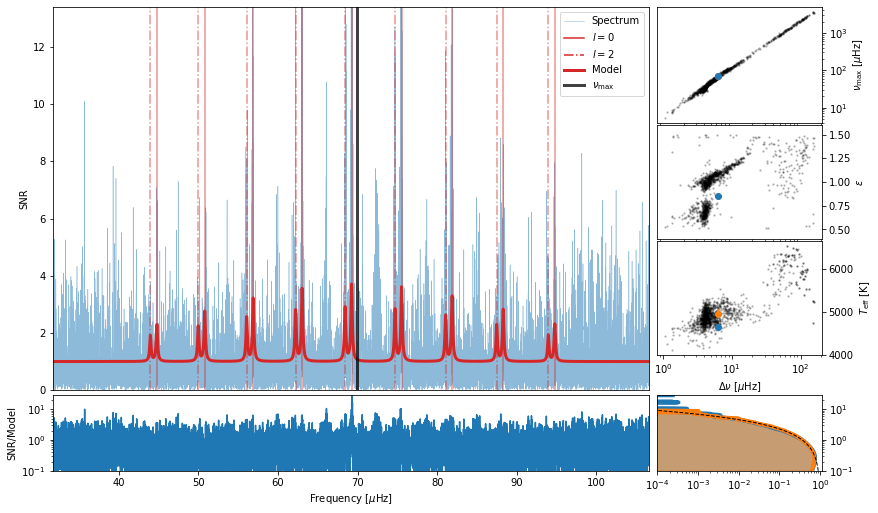

In [12]:
idx = 2
fig = jam_sess.stars[idx].plot_asyfit()

In [13]:
star = jam_sess.stars[idx]

In [14]:
star.asy_result.summary

,numax,dnu,eps,alpha,d02,env_height,env_width,mode_width,teff,bp_rp
best,69.943888,6.255759,1.068250,0.010650,0.815728,2.678053,20.710606,-0.668286,4897.470857,1.332905
mean,70.509642,6.269874,1.022882,0.010710,0.757082,2.576597,22.186737,-0.726268,4894.119852,1.298335
std,0.854989,0.014884,0.068774,0.000723,0.148569,0.207714,2.898226,0.134126,95.733702,0.093655
skew,-0.143995,0.737099,-1.669319,-0.092645,-1.871864,-2.126677,2.132557,-1.853628,-0.130075,-0.228399
2nd,68.086340,6.239570,0.849647,0.006946,0.312852,1.807957,20.585771,-1.135141,4626.901063,1.019096
16th,68.464457,6.241351,0.850117,0.007577,0.315393,1.859424,20.586369,-1.135141,4649.741419,1.048682
50th,68.511271,6.243361,0.851403,0.008407,0.316646,1.884593,20.587897,-1.128869,4652.926408,1.064279
84th,68.566531,6.244732,0.851403,0.008587,0.332189,1.904395,20.589812,-1.118827,4654.974833,1.064279
97th,68.572959,6.245061,0.852654,0.008759,0.341684,1.913983,20.590419,-1.093092,4654.974833,1.070065


In [15]:
star.asy_result.modeID

,ell,nu_mu,nu_std
0,2,43.948418,0.236798
1,0,44.769541,0.367379
2,2,49.966559,0.226885
3,0,50.788422,0.356862
4,2,56.050967,0.218254
5,0,56.873134,0.347076
6,2,62.201377,0.210321
7,0,63.024012,0.337622
8,2,68.418134,0.202704
9,0,69.240612,0.328241


In [9]:
import pickle
pickle.dump(star, open("%s.p" % (star.ID), "wb"))